In [7]:
import os
from urllib.request import urlretrieve
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/'

def maybe_download(filename):
    file_csv = os.path.splitext(filename)[0] + '.csv'
    if(not os.path.exists(file_csv)):
        urlretrieve(url + filename, filename)
        os.rename(filename, os.path.splitext(filename)[0] + '.csv')
    return file_csv
    
diabetes_csv = maybe_download('pima-indians-diabetes.data')
diabetes = pd.read_csv(diabetes_csv, header=None)

In [3]:
diabetes.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# 每一种类变量的总数。0类是糖尿病阴性，1类是糖尿病阳性
diabetes[8].value_counts()

0    500
1    268
Name: 8, dtype: int64

In [4]:
diabetes.head(20)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


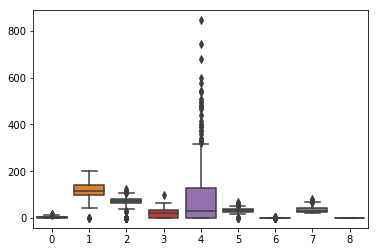

In [9]:
# 由于1，2，3，4，5列存在缺失值且缺失值标记为0，因此绘制的箱形图是不准确的。这里仅做示例用
sns.boxplot(data=diabetes)

### 统计每一列中丢失值的数量

In [34]:
print((diabetes[[1, 2, 3, 4, 5]] == 0).sum())

1      5
2     35
3    227
4    374
5     11
dtype: int64


从上面的统计可以看出，第1，2，5列只有几个零值，而第3列和第4列几乎一半行都是零值。
在Pandas, Numpy和sklearn中，我们将将丢失值标记为NaN。那么sum，count等操作中NaN的值将会被忽略。
通过pandas dataframe的`replace()`函数，可以将丢失值标记为NaN。
标记了丢失值后，可以使用`isnull()`函数将数据中所有的NaN值标记为真，并获取每列丢失值的计数。

In [35]:
diabetes[[1,2,3,4,5]] = diabetes[[1,2,3,4,5]].replace(0, np.NaN)
diabetes.isnull().sum()

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64

In [36]:
diabetes.head(20)

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


### 缺失值导致的问题
数据集中存在缺失值时可能会导致机器学习算法发生错误。
例如以下的LDA算法，当数据集中存在缺失值时，直接运行该算法会报错。

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# split diabetes data into inputs and outputs
values = diabetes.values
X = values[:, 0:8]
y = values[:, 8]
# evaluate an LDA model on the diabetes data using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### 处理缺失值的方法
#### 删除丢失行
这是最简单的方法。pandas中的`dropna()`函数可以用于删除缺少数据的行或列

In [38]:
diabetes_dropna = diabetes.dropna()
print(diabetes_dropna.shape)

(392, 9)


重新运行上面的LDA模型，顺利通过

In [40]:
# split diabetes data into inputs and outputs
values = diabetes_dropna.values
X = values[:, 0:8]
y = values[:, 8]
# evaluate an LDA model on the diabetes data using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.78582892934


#### 估算丢失值
替换较少的值时可以有很多考虑。例如：
+ 在域内具有含义的常量值，例如不同于其他所有的值
+ 来自另一个随机记录的值
+ 该列的均值、中值或众数值
+ 由另一种预测模型估计的值

pandas中提供了`fillna()`函数来替换具有特定值的丢失值
`fillna()`中提供了一些填充丢失值的方法（通过`method`参数指定），也可以指定填充的缺失值。例如以前一个未缺失数据填充`method='pad'`（pad和ffill效果相同），以后一个未缺失数据填充`method='ffill'`（backfill和bfill效果相同）。

另一个需要注意的是`fillna()`中的`limit`参数。它限制了一段连续缺失值中填充的个数。默认为None。

In [54]:
diabetes.fillna(method='bfill', limit=1)

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,23.0,94.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,32.0,88.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,70.0,45.0,543.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,37.6,0.232,54,1


In [58]:
# 使用均值填充
diabetes_meanfill = diabetes.fillna(diabetes.mean())
print(diabetes_meanfill.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


scikit-learn提供了可用于替换缺失值的`imputer()`预处理类。这个类直接在NumPy数组上运行。使用的方法通过`strategy`参数指定，默认为`'mean'`。`fit_transform`方法会训练并填充给定的参数中的数据缺失值。详见[sklearn中的Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html#sklearn.preprocessing.Imputer.fit_transform)。

In [65]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='mean')
diabetes_imputer = imputer.fit_transform(diabetes.values)
print(np.isnan(diabetes_imputer).sum())

0


### 用填充后的数据训练LDA

In [68]:
values = diabetes_imputer
X = values[:, 0:8]
y = values[:, 8]
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.766927083333


### 支持丢失值的算法

有一些算法可以灵活应对缺失值，例如k-Nearest Neighbors，当值丢失时，它可以将其不计入距离测量。
另一些算法，例如分类和回归树，可以在构建预测模型时将丢失值看作唯一且不同的值。
遗憾的是，决策树和k-Nearest Neighbors对于丢失值并不友好。
不管怎样，如果你考虑使用其他算法（如xgboost）或开发自己的执行，这依然是一个选择。